### 1) 
For the following training data, build a linear regression model. Assume w and b are
initialized with 1 and learning parameter is set to 0.001.

x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

Assume learning rate =0.001. Plot the graph of epoch in x axis and loss in y axis.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32)


w = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
b = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

In [3]:
learning_rate = 0.001
epochs = 1000

def compute_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

losses = []

In [4]:
for epoch in range(epochs):
    y_pred = w * x + b
    
    loss = compute_loss(y_pred, y)
    
    losses.append(loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

Epoch 100/1000, Loss: 0.017305942252278328
Epoch 200/1000, Loss: 0.017266780138015747
Epoch 300/1000, Loss: 0.017227966338396072
Epoch 400/1000, Loss: 0.017189394682645798
Epoch 500/1000, Loss: 0.017150914296507835
Epoch 600/1000, Loss: 0.017113009467720985
Epoch 700/1000, Loss: 0.017075179144740105
Epoch 800/1000, Loss: 0.01703762449324131
Epoch 900/1000, Loss: 0.017000438645482063
Epoch 1000/1000, Loss: 0.016963301226496696


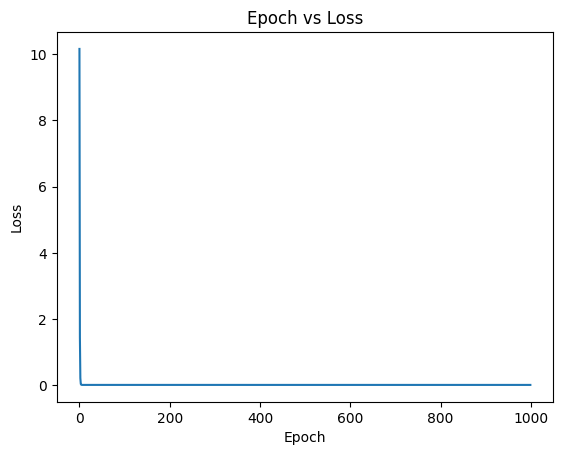

In [5]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

### 2)
Find the value of w.grad, b.grad using analytical solution for the given linear regression
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same
and verify the values of w.grad , b.grad and updated parameter values for two epochs.
Consider the difference between predicted and target values of y is defined as (yp-y).

In [6]:
x = torch.tensor([2, 4], dtype=torch.float32)
y = torch.tensor([20, 40], dtype=torch.float32)

w = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
b = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

learning_rate = 0.001

epochs = 2

In [7]:
for epoch in range(epochs):
    
    y_pred = w * x + b
    
    diff = y_pred - y
    
    grad_w = -2 * torch.mean(x * diff)
    grad_b = -2 * torch.mean(diff)
    
    
    with torch.no_grad():
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

    
    print(f"Epoch {epoch + 1}:")
    print(f"Gradient with respect to w: {grad_w.item()}")
    print(f"Gradient with respect to b: {grad_b.item()}")
    print(f"Updated w: {w.item()}")
    print(f"Updated b: {b.item()}\n")

Epoch 1:
Gradient with respect to w: 174.0
Gradient with respect to b: 52.0
Updated w: 0.8259999752044678
Updated b: 0.9480000138282776

Epoch 2:
Gradient with respect to w: 177.79200744628906
Gradient with respect to b: 53.14800262451172
Updated w: 0.64820796251297
Updated b: 0.8948519825935364



### 3)
Revise the linear regression model by defining a user defined class titled RegressionModel
with two parameters w and b as its member variables. Define a constructor to initialize w
and b with value 1. Define four member functions namely forward(x) to implement wx+b,
update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp)
to implement MSE Loss given the predicted y value yp and the target label y. Define an
object of this class named model and invoke all the methods. Plot the graph of epoch vs
loss by varying epoch to 100 iterations.

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])

y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

In [8]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

In [9]:
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad = True)
        self.b = torch.rand([1], requires_grad = True)
        
    def forward(self, x):
        return self.w * x + self.b
    
    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad
    
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
        
def criterion(yj, y_p):
    return (yj-y_p)**2

In [10]:
model = RegressionModel()

loss_list = []

for epochs in range(100):
    
    loss = 0.0
    
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)
        
    loss = loss / len(x)
    loss_list.append(loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        model.update()
        
    model.reset_grad()
    
    print('The parameter are w={}, b={}, and loss={}'.format(model.w, model.b, loss.item()))

The parameter are w=tensor([4.6127], requires_grad=True), b=tensor([1.0384], requires_grad=True), and loss=29194.40625
The parameter are w=tensor([7.5192], requires_grad=True), b=tensor([1.2416], requires_grad=True), and loss=12567.0576171875
The parameter are w=tensor([9.4047], requires_grad=True), b=tensor([1.3747], requires_grad=True), and loss=5568.9755859375
The parameter are w=tensor([10.6278], requires_grad=True), b=tensor([1.4622], requires_grad=True), and loss=2623.63330078125
The parameter are w=tensor([11.4212], requires_grad=True), b=tensor([1.5202], requires_grad=True), and loss=1383.998046875
The parameter are w=tensor([11.9359], requires_grad=True), b=tensor([1.5591], requires_grad=True), and loss=862.25634765625
The parameter are w=tensor([12.2697], requires_grad=True), b=tensor([1.5855], requires_grad=True), and loss=642.66015625
The parameter are w=tensor([12.4861], requires_grad=True), b=tensor([1.6039], requires_grad=True), and loss=550.2301635742188
The parameter a

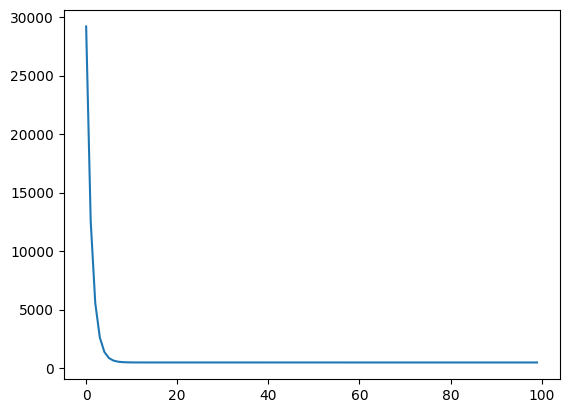

In [11]:
plt.plot(loss_list)
plt.show()

### 4)
Convert your program written in Qn 3 to extend nn.module in your model. Also override
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

In [12]:
class DatasetLR(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel,self).__init__()
        self.w = nn.Parameter(torch.tensor(1.0))
        self.b = nn.Parameter(torch.tensor(1.0))

    def forward(self,x):
        return self.w * x + self.b

In [13]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).reshape(-1, 1)  
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).reshape(-1, 1)
dataset = DatasetLR(x,y)
dataloader = DataLoader(dataset,batch_size=1, shuffle=True)
model = RegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [14]:
epochs = 1000
loss_fn = nn.MSELoss()
loss_list = []
for epoch in range(epochs):
    total_loss = 0.0
    for xb, yb in dataloader:
        
        optimizer.zero_grad()

        y_pred = model(xb)

        loss = loss_fn(y_pred, yb)
        total_loss += loss.item()

        loss.backward()

        optimizer.step()

    avg_loss = total_loss / len(dataloader)
    loss_list.append(avg_loss)
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}')

Epoch [1/1000], Loss: 22550.96268310547
Epoch [101/1000], Loss: 493.45023880004885
Epoch [201/1000], Loss: 492.2321662902832
Epoch [301/1000], Loss: 492.35529069900514
Epoch [401/1000], Loss: 492.03549365997316
Epoch [501/1000], Loss: 491.36351146697996
Epoch [601/1000], Loss: 490.4607004165649
Epoch [701/1000], Loss: 490.28466882705686
Epoch [801/1000], Loss: 489.3037696838379
Epoch [901/1000], Loss: 488.62605419158933


tensor(0.6482, requires_grad=True) tensor(0.8949, requires_grad=True)


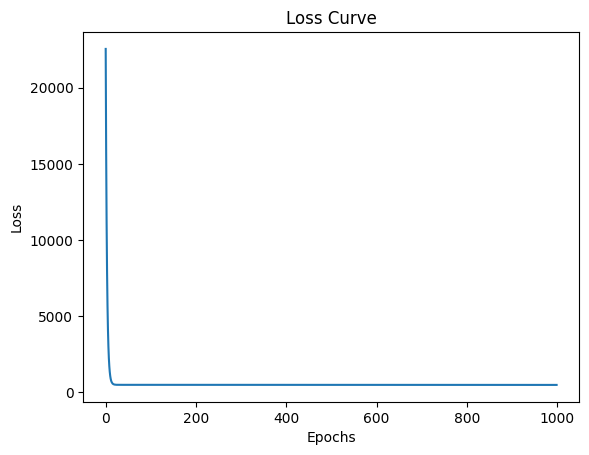

tensor([[ 67.1272],
        [ 92.6033],
        [156.2937],
        [207.2460],
        [258.1983]])


In [15]:
print(w,b)
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

with torch.no_grad():
    pred = model(x)
    print(pred)

### 5)
Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data
provided in Qn. 1. Also plot the graph.

In [16]:
class DatasetLR(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]


x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).reshape(-1, 1)  
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 4.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).reshape(-1, 1)  



In [17]:
dataset = DatasetLR(x,y)
dataloader = DataLoader(dataset,batch_size=1, shuffle=True)
model = nn.Linear(in_features=1, out_features=1)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [18]:
epochs = 100
loss_fn = nn.MSELoss()
loss_list = []
for epoch in range(epochs):
    total_loss = 0.0
    for xb, yb in dataloader:
        
        optimizer.zero_grad()

        y_pred = model(xb)

        loss = loss_fn(y_pred, yb)
        total_loss += loss.item()

        loss.backward()

        optimizer.step()

    avg_loss = total_loss / len(dataloader)
    loss_list.append(avg_loss)
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}')

Epoch [1/100], Loss: 122.91797629646634
Epoch [11/100], Loss: 4.136085044410404
Epoch [21/100], Loss: 4.131171996016866
Epoch [31/100], Loss: 4.153265607674889
Epoch [41/100], Loss: 4.107525439183835
Epoch [51/100], Loss: 4.111407814889073
Epoch [61/100], Loss: 4.083541399390292
Epoch [71/100], Loss: 4.137111770272579
Epoch [81/100], Loss: 4.129965258741994
Epoch [91/100], Loss: 4.1194849902885435


tensor(0.6482, requires_grad=True) tensor(0.8949, requires_grad=True)


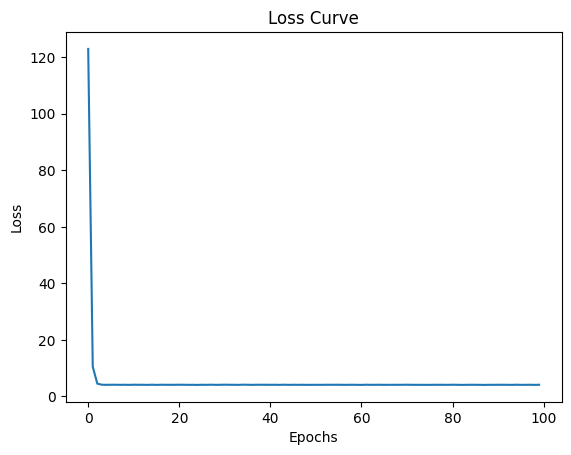

In [19]:
print(w,b)
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

### 6)
Implement multiple linear regression for the data provided below

Verify your answer for the data point X1=3, X2=2.

In [20]:
x1 = torch.tensor([3.0,4.0,5.0,6.0,2.0])
x2 = torch.tensor([8.0,5.0,7.0,3.0,1.0])
y = torch.tensor([-3.7,3.5,2.5,11.5,5.7])
w1 = torch.tensor(1.0, requires_grad = True)
w2 = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(1.0,requires_grad = True)

In [21]:
learning_rate = 0.001
epochs = 1000
losses = []
for epoch in range(epochs):
    y_pred = w1 * x1 + w2 * x2 + b
    loss = torch.mean((y_pred - y) ** 2)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b -= learning_rate * b.grad
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()

    if epoch % 100 == 0:
        print(f" Epoch {epoch+1} , Loss {loss.item()}")

 Epoch 1 , Loss 80.82600402832031
 Epoch 101 , Loss 7.284582614898682
 Epoch 201 , Loss 2.1840436458587646
 Epoch 301 , Loss 0.7666763663291931
 Epoch 401 , Loss 0.3688342869281769
 Epoch 501 , Loss 0.2533441185951233
 Epoch 601 , Loss 0.21618279814720154
 Epoch 701 , Loss 0.20087821781635284
 Epoch 801 , Loss 0.19179639220237732
 Epoch 901 , Loss 0.18460385501384735


In [22]:
x = torch.tensor([1.0, 5.0, 10.0, 10.0, 25.0, 50.0, 70.0, 75.0, 100.0]).view(-1, 1)  # Reshape to (N, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).view(-1, 1).float()  # Convert to float for BCE

class LogisticRegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [23]:
dataset = LogisticRegressionDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = LogisticRegressionModel()

criterion = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
loss_list = []

for epoch in range(epochs):
    total_loss = 0.0
    
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        
        y_pred = model(batch_x)
        
        loss = criterion(y_pred, batch_y)
        total_loss += loss.item()
        
        loss.backward()
        
        optimizer.step()
    
    avg_loss = total_loss / len(dataloader)
    loss_list.append(avg_loss)
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

Epoch 100/1000, Loss: 2.25710036357259
Epoch 200/1000, Loss: 1.8372104950249195
Epoch 300/1000, Loss: 0.33136491167412413
Epoch 400/1000, Loss: 0.36919932471321065
Epoch 500/1000, Loss: 0.23258740310039785
Epoch 600/1000, Loss: 0.08861648052432732
Epoch 700/1000, Loss: 0.07755564398879262
Epoch 800/1000, Loss: 0.084885633370517
Epoch 900/1000, Loss: 0.07087067283120835
Epoch 1000/1000, Loss: 0.054709991073953766


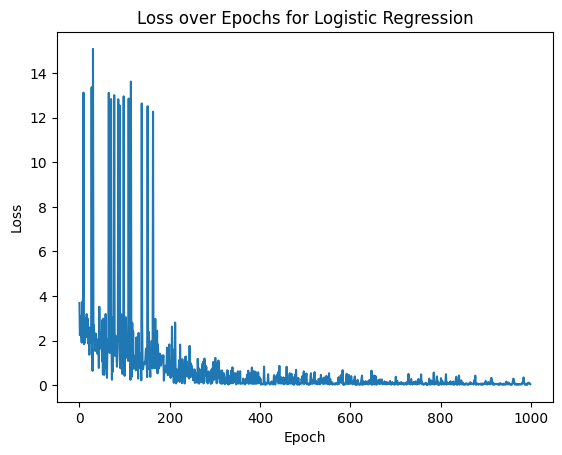

Predictions (Probabilities):
tensor([[8.8259e-04],
        [1.8202e-03],
        [4.4919e-03],
        [4.4919e-03],
        [6.3983e-02],
        [8.6376e-01],
        [9.9581e-01],
        [9.9830e-01],
        [9.9998e-01]])

Binary Predictions (0 or 1):
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [24]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Logistic Regression')
plt.show()

with torch.no_grad():
    model.eval()
    predictions = model(x)
    print("Predictions (Probabilities):")
    print(predictions)

    binary_predictions = (predictions > 0.5).float()
    print("\nBinary Predictions (0 or 1):")
    print(binary_predictions)